# Personality Prediction using Machine Learning

## Objective
The primary objective of this project is to develop a machine learning model to predict an individual's personality as either an **Extrovert (1)** or **Introvert (0)** based on behavioral and social features. This can assist in areas such as psychological assessments, personalized recommendations, or HR processes.


## Use Case

Personality prediction has wide applications, including:

- Psychological counseling and support.
- Improving hiring processes by understanding personality fit.
- Tailoring content or product recommendations based on social preferences.
- Academic research in behavioral science.


## Dataset Description

The dataset contains the following features:

- **Time_spent_Alone**: Hours spent alone daily (0–11).
- **Stage_fear**: Presence of stage fright (1 = Yes, 0 = No).
- **Social_event_attendance**: Frequency of attending social events (0–10).
- **Going_outside**: Frequency of going outside (0–7).
- **Drained_after_socializing**: Feeling drained after socializing (1 = Yes, 0 = No).
- **Friends_circle_size**: Number of close friends (0–15).
- **Post_frequency**: Social media post frequency (0–10).
- **Personality**: Target variable (1 = Extrovert, 0 = Introvert).


## Project Workflow

The following steps are followed in this project:

1. **Data Loading**
   - Read the dataset using Pandas.
   - Preview the data structure.

2. **Data Exploration**
   - Check for missing values.
   - Inspect data types and unique values.
   - Analyze class distribution for imbalance.

3. **Data Visualization**
   - Visualize feature distributions.
   - Explore correlations between features.
   - Visualize class distribution.

4. **Data Preprocessing**
   - Handle missing values if present.
   - Encode categorical features if required.
   - Normalize/scale the data if needed.

5. **Model Building**
   - Split the data into training and testing sets.
   - Train machine learning models (e.g., Logistic Regression, Decision Tree, Random Forest).
   - Evaluate model performance using metrics such as accuracy, precision, recall, and confusion matrix.

6. **Model Evaluation**
   - Compare different models.
   - Identify the best-performing model.
   - Address overfitting or underfitting if observed.

7. **Conclusion**
   - Summarize findings.
   - Provide recommendations for future improvements.

## Conclusion

This project demonstrates the application of machine learning in personality prediction using behavioral features. The selected model provides valuable insights, though further work is recommended to enhance accuracy and real-world applicability.


In [73]:
# import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np

# we want our plots to appear inside thr notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation and cross-validation
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report , precision_score , recall_score , f1_score , RocCurveDisplay

# and we have imported all the necessary packages for our project

#### Data

This includes various steps :
1. read data from the csv dataset and store it in a pandas dataframe
2. check all the contents of the dataframe
3. take a quick look at the data and datashape
4. check if there is any null value and proceed accordingly
5. take a look at the data in detail
6. check the distribution of data for class imbalance
7. plot the required plots as per the data

In [74]:
data = pd.read_csv("data/personality_dataset-final.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [75]:
data.shape

(2900, 8)

In [76]:
data.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


In [78]:
data.describe().style.background_gradient(cmap='summer')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,0.486207,3.963354,3.000000,0.485172,6.268863,3.564727,0.514138
std,3.441180,0.499896,2.872608,2.221597,0.499866,4.232340,2.893587,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.963354,3.000000,0.000000,5.000000,3.000000,1.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


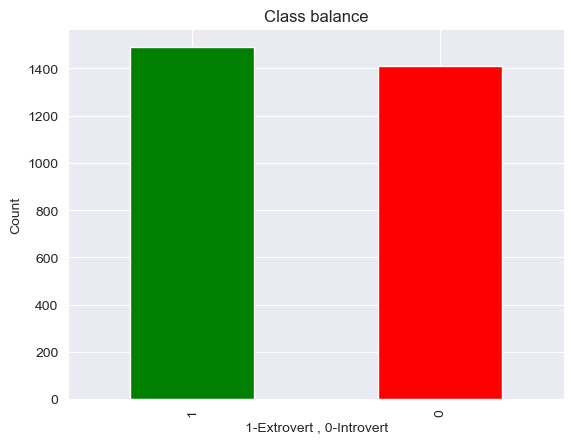

In [79]:
data.Personality.value_counts().plot(kind='bar' , color=['green' , 'red'])
plt.xlabel('1-Extrovert , 0-Introvert')
plt.ylabel('Count')
plt.title('Class balance')
plt.show()

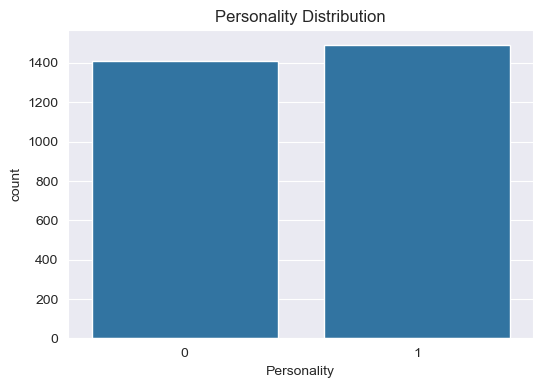

In [80]:
# Target countPlot
plt.figure(figsize=(6,4))
sns.countplot(x='Personality', data=data)
plt.title('Personality Distribution')
plt.show()


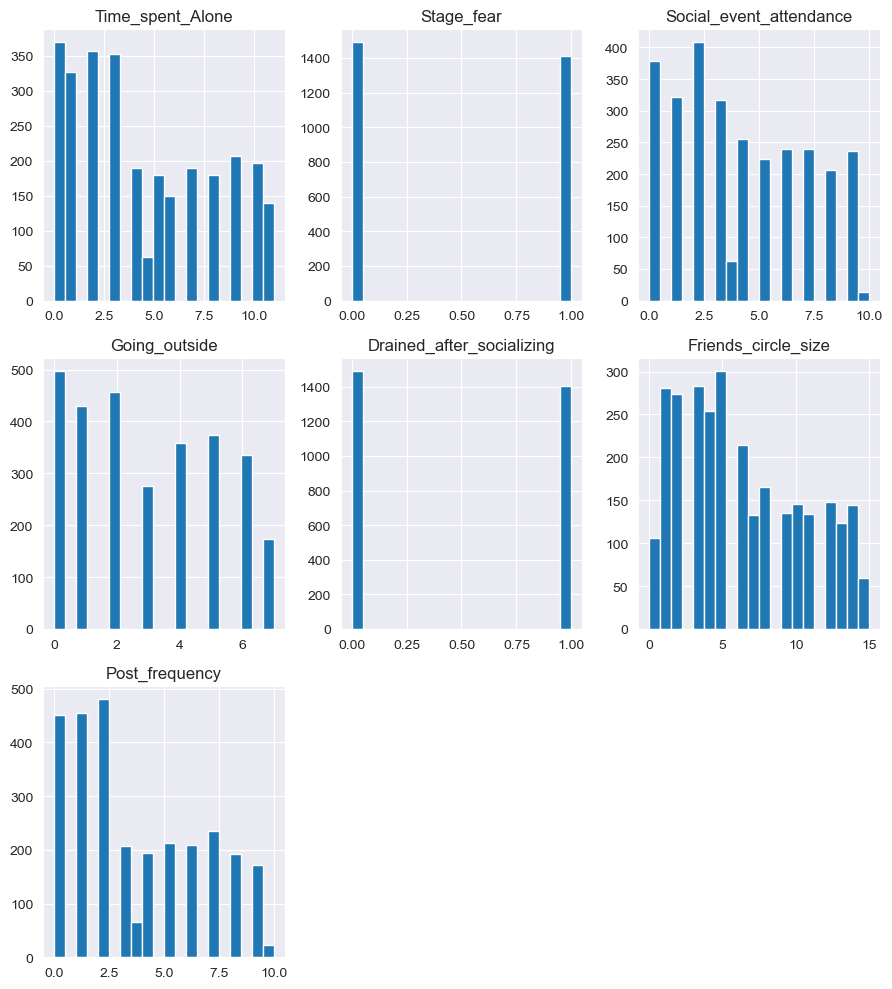

In [81]:
# Histogram for each numeric features
num_features = data.columns.drop('Personality')
data[num_features].hist(bins=20 , figsize=(9,10))
# plt.subtitle('Histogram of Personality Distribution')

plt.tight_layout()
plt.show()

A boxplot (or whisker plot) visualizes the summary statistics of a dataset:

Median (middle line in the box)

Interquartile range (IQR) (the box shows Q1 to Q3)

Whiskers (typically 1.5×IQR from the box)

Outliers (individual points outside the whiskers)


A boxplot is great for comparing medians and spotting outliers, but it doesn’t show the full distribution shape.

In Seaborn, `sns.boxplot()` is used.

Boxplot → focuses on summary stats (median, quartiles, outliers).


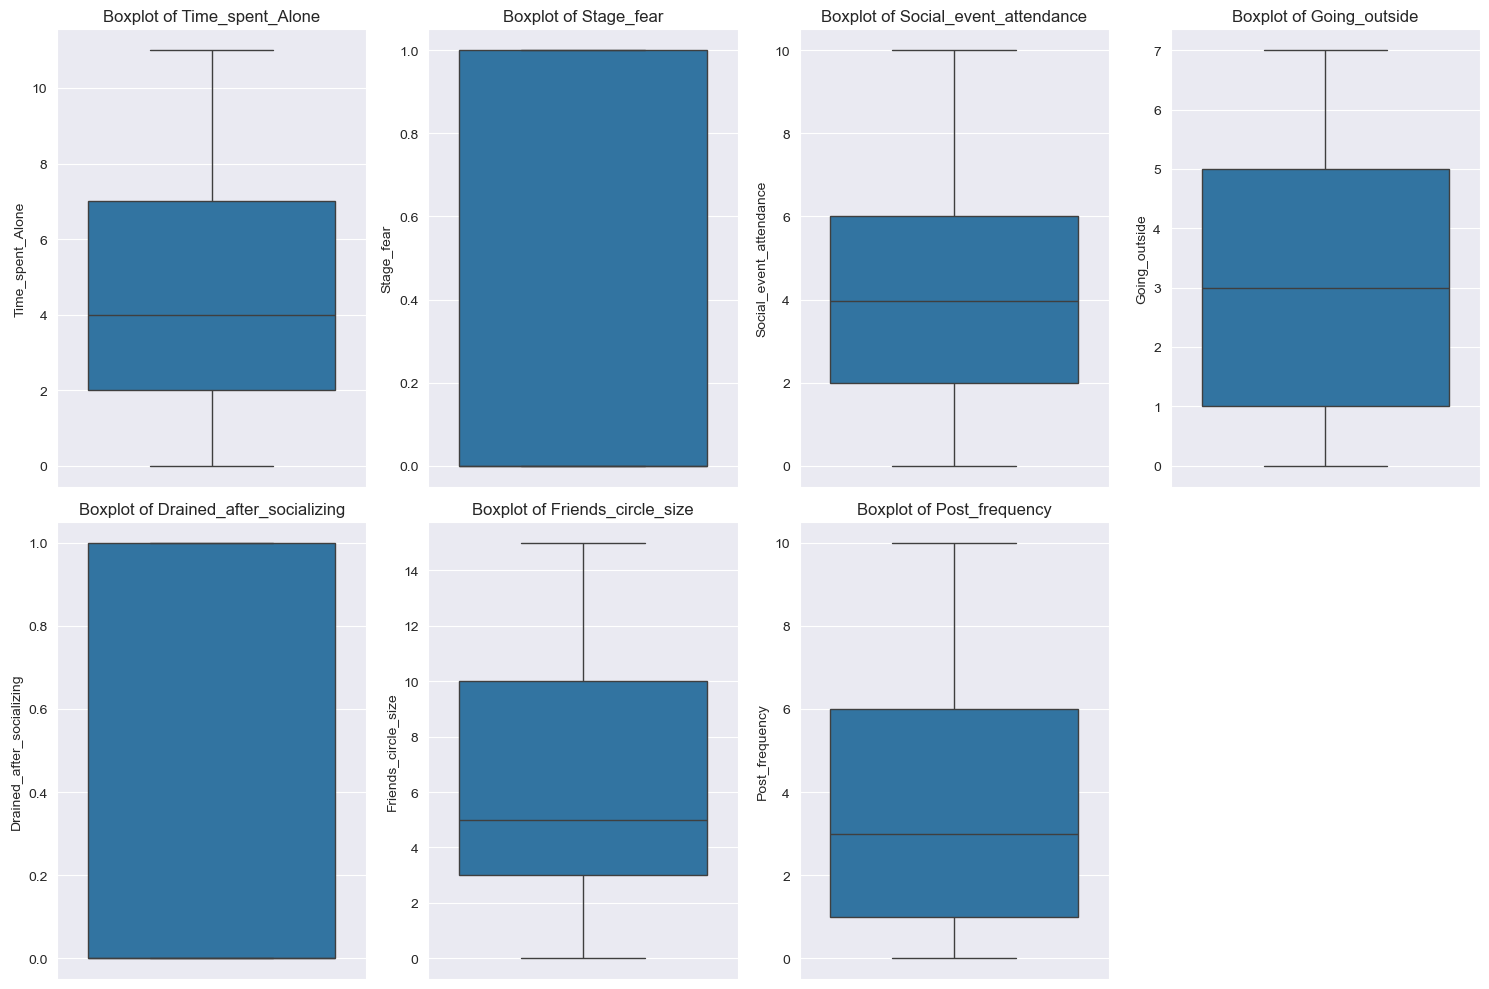

In [82]:
# Boxplot for outliers
plt.figure(figsize=(15,10))
for i,col in enumerate(num_features):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Violin Plot (in Seaborn)
A violin plot is a combination of a boxplot and a KDE (kernel density estimate). It shows the distribution of the data across different categories, including:

The probability density of the data at different values (shown as a mirrored, smooth curve).

A mini boxplot inside, showing the median, quartiles, and possible outliers.
It’s useful when you want to see both summary statistics and the shape of the distribution.

In Seaborn, `sns.violinplot()` is used.

Violin plot → adds a density shape to show how the data is distributed.


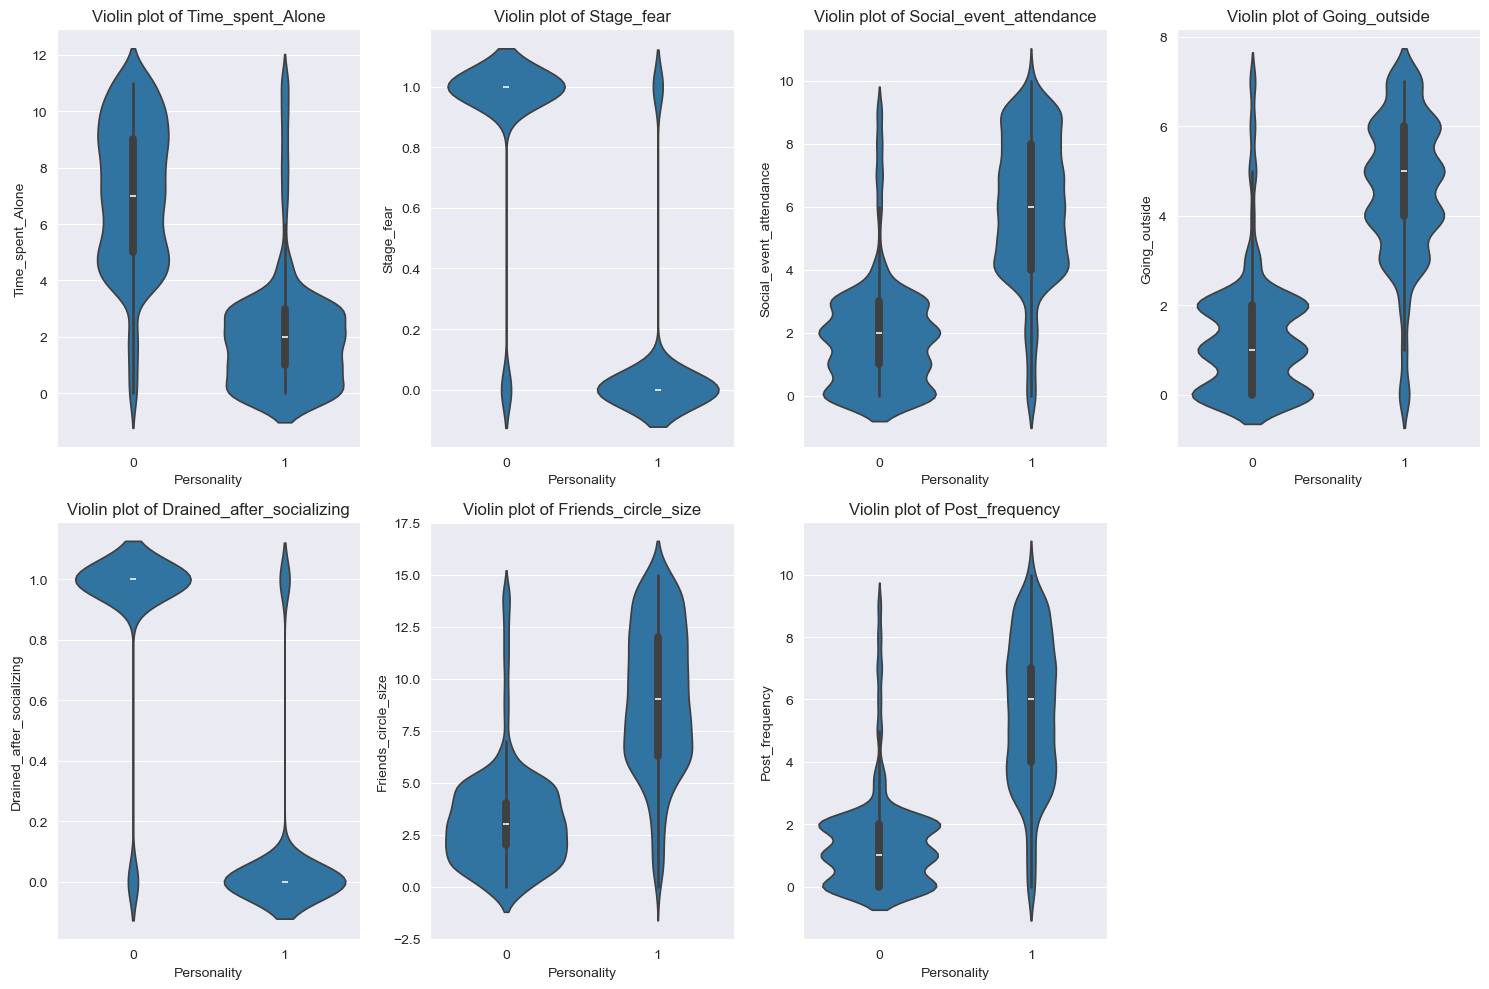

In [83]:
# Features vs Personality
plt.figure(figsize=(15,10))
for i,col in enumerate(num_features):
    plt.subplot(2,4,i+1)
    sns.violinplot(x='Personality', y=col, data=data)
    plt.title(f'Violin plot of {col}')
plt.tight_layout()
plt.show()

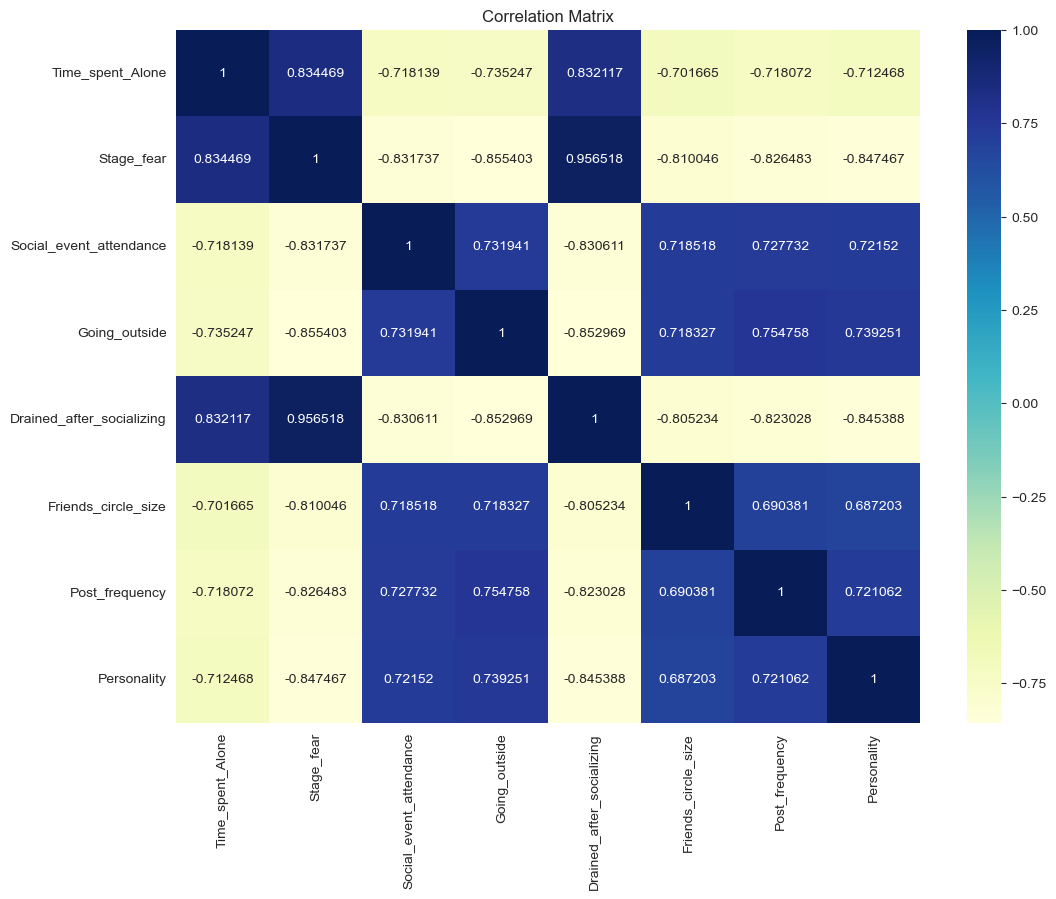

In [84]:
correlation_matrix = data.corr()
fig , ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(correlation_matrix , annot=True , cmap='YlGnBu' ,fmt='g')
ax.set_title('Correlation Matrix')
plt.show()

#### Modelling

In [85]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [86]:
# split the data in x and y where x is feature variable and y is target variable

x = data.drop('Personality', axis=1)
y = data['Personality']

In [87]:
x.shape , y.shape

((2900, 7), (2900,))

In [88]:
# split the data in train and test sets
np.random.seed(92)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

We are going to use 3 machine learning models :
1. `Linear SVC`
2. `K-Nearest Neighbors Classifier`
3. `Random Forest Classifier`

In [89]:
# put the models in a directory

models = {"Linear SVC" : LinearSVC() ,
          "Random Forest" : RandomForestClassifier() ,
          "K_Neighbors" : KNeighborsClassifier()
          }

# create a function to fit and score the models

def fit_and_score(models , x_train , x_test , y_train , y_test ):
    """
    :param models: a dictionary of different scikit learn models.
    :param x_train: features of training data.
    :param x_test: features of test data.
    :param y_train: target values of training data.
    :param y_test: target values of test data.
    :return: the score of the models as a dictionary.
    """
    np.random.seed(55)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [90]:
model_scores = fit_and_score(models , x_train , x_test , y_train , y_test )
model_scores

{'Linear SVC': 0.906896551724138,
 'Random Forest': 0.9086206896551724,
 'K_Neighbors': 0.9189655172413793}

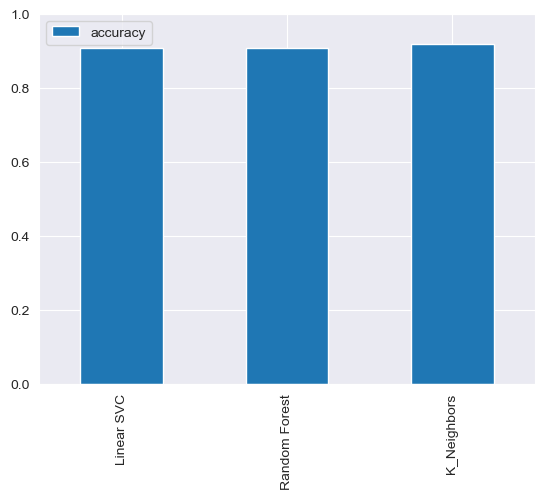

In [91]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot(kind='bar')
plt.ylim(0,1.0)
plt.show()

We will proceed to these with the best models till now (K_Neighbors and RandomForestClassifier) :
1. `Hyperparameter Tuning`
2. `Confusion matrix`
3. `Cross-validation`
4. `Precision`
5. `Recall`
6. `F1-score`
7. `Feature importance`


In [92]:
# Let's tune KNN

np.random.seed(55)

train_score = []
test_score = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for n in neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))


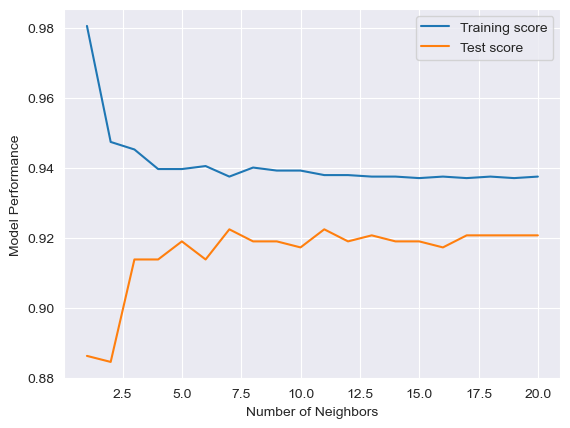

Best KNN score is 0.9224137931034483


In [93]:
plt.plot(neighbors, train_score, label="Training score")
plt.plot(neighbors, test_score, label="Test score")
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Performance')
plt.legend()
plt.show()

print(f'Best KNN score is {max(test_score)}')

In [94]:
# Let's tune RandomForestClassifier

np.random.seed(55)

train_score2 = []
test_score2 = []

estimators = range(1,21)

random_cls = RandomForestClassifier()

for n in estimators:
    random_cls.set_params(n_estimators=n)
    random_cls.fit(x_train, y_train)
    train_score2.append(random_cls.score(x_train, y_train))
    test_score2.append(random_cls.score(x_test, y_test))

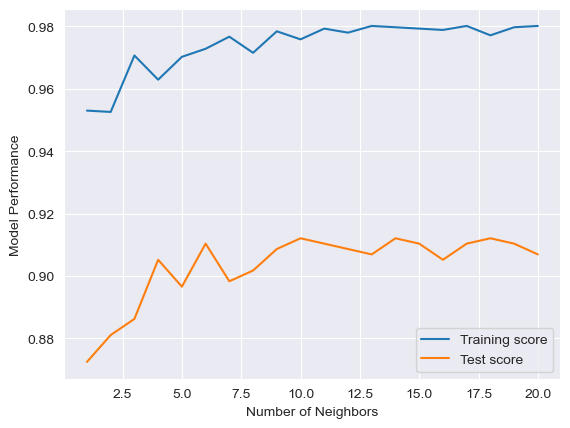

Best RandomForestClassifier score is 0.9120689655172414


In [95]:
plt.plot(neighbors, train_score2, label="Training score")
plt.plot(neighbors, test_score2, label="Test score")
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Performance')
plt.legend()
plt.show()

print(f'Best RandomForestClassifier score is {max(test_score2)}')

In [96]:
# GridSearchCV for KNN
param_grid = {'n_neighbors': np.arange(1,50,4) ,
              'weights': ['uniform', 'distance'] ,
              'metric': ['euclidean', 'manhattan' , 'minkowski']
              }

knn_grid_cv = GridSearchCV(KNeighborsClassifier(),
                           param_grid=param_grid ,
                           cv=5,
                           n_jobs=-1 ,
                           verbose=True)
knn_grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [97]:
knn_grid_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(9), 'weights': 'uniform'}

In [98]:
y_preds1 = knn_grid_cv.predict(x_test)

In [99]:
knn_grid_cv.score(x_test, y_test)

0.9206896551724137

In [100]:
# GridSearchCV for RandomForestClassifier
param_grid_rf = {'n_estimators': np.arange(1,50,8) ,
                 'max_depth': [None , 3 , 5 , 10] ,
                 'min_samples_leaf': np.arange(2,20,5) ,
                 'min_samples_split': np.arange(2,20,5)
                 }

rf_grid_cv = GridSearchCV(RandomForestClassifier(),
                          param_grid=param_grid_rf ,
                          cv=5,
                          verbose=True)
rf_grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 2,  7, 12, 17]),
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([ 1,  9, 17, 25, 33, 41, 49])},
             verbose=True)

In [101]:
rf_grid_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': np.int64(2),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(17)}

In [102]:
y_preds2 = rf_grid_cv.predict(x_test)

In [103]:
rf_grid_cv.score(x_test, y_test)

0.9189655172413793

# import pickle to save the model
import pickle as pickle

pickle.dump(knn_grid_cv, open('models/knn_grid_cv.pkl', 'wb'))
pickle.dump(rf_grid_cv, open('models/rf_grid_cv.pkl', 'wb'))


#### Evaluating our tuned machine learning classifier beyond accuracy
1. ROC curve and AUC score
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

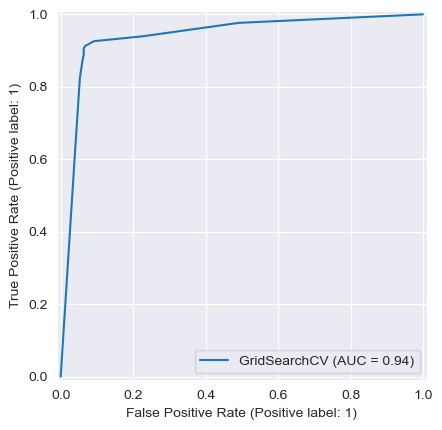

In [104]:
# plot the ROC curve score and calculate auc metrics

RocCurveDisplay.from_estimator(knn_grid_cv, x_test, y_test)
plt.show()

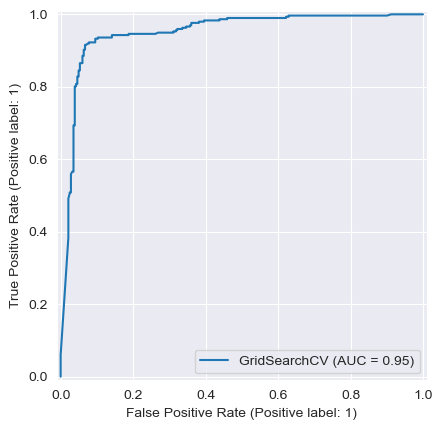

In [105]:
RocCurveDisplay.from_estimator(rf_grid_cv, x_test, y_test)
plt.show()

In [106]:
# Confusion matrix for KNN
print(confusion_matrix( y_test , y_preds1))

[[265  18]
 [ 28 269]]


In [107]:
# Confusion matrix for RandomForestClassifier
print(confusion_matrix(y_test, y_preds2))

[[264  19]
 [ 28 269]]


In [108]:
# plot the confusion matrix

def plot_confusion_matrix(y_test , y_preds):
    """
    plots a confusion matrix for given :
    :param y_test: target variable of test set
    :param y_preds: target variable of prediction on test set
    """
    fig , ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='YlGnBu', fmt='g')
    ax.set(title='Confusion matrix'  , ylabel='True label' , xlabel='Predicted label' )
    plt.show()



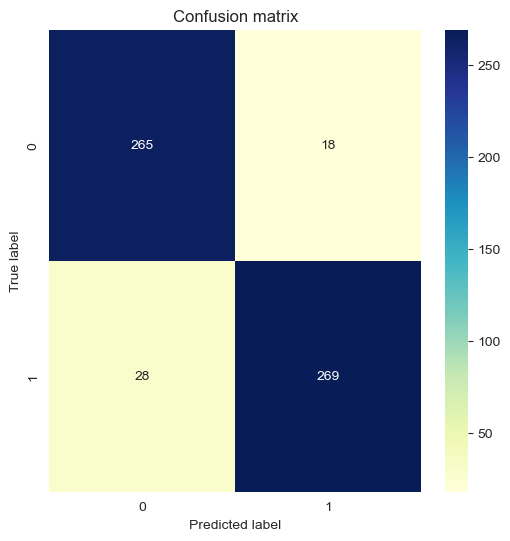

In [109]:
plot_confusion_matrix(y_test , y_preds1)

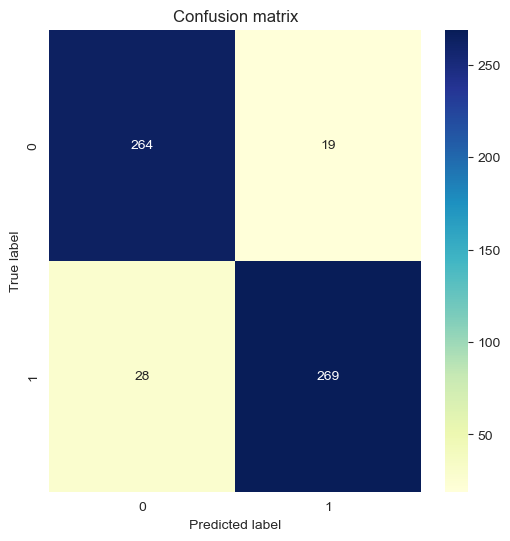

In [110]:
plot_confusion_matrix(y_test , y_preds2)

In [111]:
# classification report for KNN
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       283
           1       0.94      0.91      0.92       297

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [112]:
# classification report for random forest classifier
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       283
           1       0.93      0.91      0.92       297

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [113]:
# check for hyperparameters of KNN
knn_grid_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(9), 'weights': 'uniform'}

In [114]:
model1 = KNeighborsClassifier(
    n_neighbors=9,
    weights='uniform',
    metric='manhattan',
)

In [115]:
acc1 = cross_val_score(model1, x_train, y_train, cv=5).mean()
acc1

np.float64(0.9383620689655172)

In [116]:
pre1 = cross_val_score(model1, x_train, y_train, cv=5).mean()
pre1

np.float64(0.9383620689655172)

In [117]:
rec1 = cross_val_score(model1, x_train, y_train, cv=5).mean()
rec1

np.float64(0.9383620689655172)

In [118]:
f1_score1 = cross_val_score(model1, x_train, y_train, cv=5).mean()
f1_score1

np.float64(0.9383620689655172)

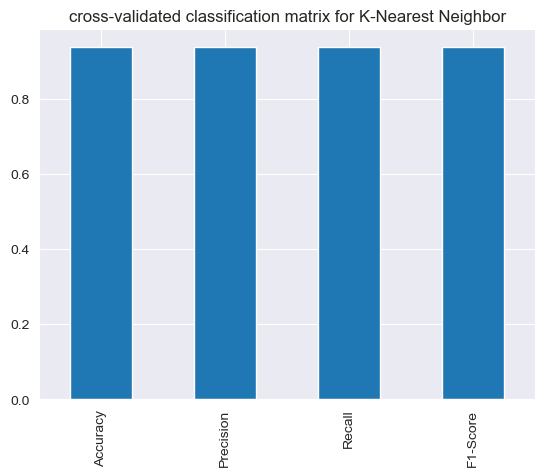

In [119]:
# visual representation
cv_matrix1 = pd.DataFrame({
    'Accuracy': acc1,
    'Precision': pre1,
    'Recall': rec1,
    'F1-Score': f1_score1
} , index=[0])
cv_matrix1.T.plot.bar(title="cross-validated classification matrix for K-Nearest Neighbor" , legend=False)
plt.show()

In [120]:
cv_matrix1

,Accuracy,Precision,Recall,F1-Score
0,0.938362,0.938362,0.938362,0.938362


In [121]:
# check for hyperparameter of RandomForestClassifier
rf_grid_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': np.int64(2),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(17)}

In [122]:
model2 = RandomForestClassifier(
    n_estimators=17,
    min_samples_leaf=2,
    min_samples_split=2,
    max_depth=None
)

In [123]:
acc2 = cross_val_score(model2, x_train, y_train, cv=5).mean()
acc2

np.float64(0.9349137931034482)

In [124]:
pre2 = cross_val_score(model2, x_train, y_train, cv=5).mean()
pre2

np.float64(0.9349137931034482)

In [125]:
rec2 = cross_val_score(model2, x_train, y_train, cv=5).mean()
rec2

np.float64(0.9357758620689655)

In [126]:
f1_score2 = cross_val_score(model2, x_train, y_train, cv=5).mean()
f1_score2

np.float64(0.9362068965517241)

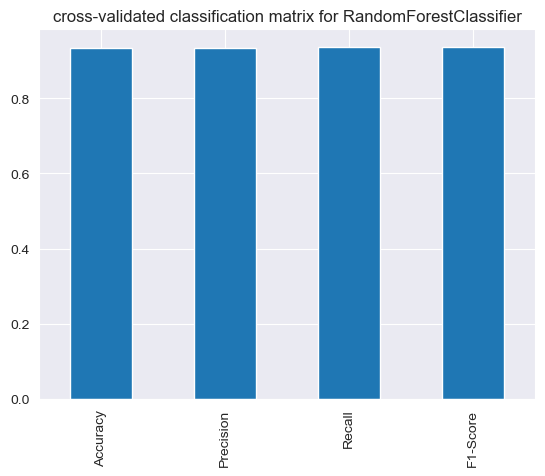

In [127]:
# visual representation
cv_matrix2 = pd.DataFrame({
    'Accuracy': acc2,
    'Precision': pre2,
    'Recall': rec2,
    'F1-Score': f1_score2
} , index=[0])
cv_matrix2.T.plot.bar(title="cross-validated classification matrix for RandomForestClassifier" , legend=False)
plt.show()

In [128]:
cv_matrix2

,Accuracy,Precision,Recall,F1-Score
0,0.934914,0.934914,0.935776,0.936207


#### Feature Importance

In [129]:
# K-Nearest Neighbor feature importance
k_nearest_model = KNeighborsClassifier(
    n_neighbors=9,
    weights='uniform',
    metric='manhattan',
)
k_nearest_model.fit(x_train, y_train)
k_nearest_model.score(x_test, y_test)

0.9206896551724137

In [130]:
random_model = RandomForestClassifier(
    n_estimators=17,
    min_samples_leaf=2,
    min_samples_split=2,
    max_depth=None
)

random_model.fit(x_train, y_train)
random_model.score(x_test, y_test)

0.9206896551724137

In [131]:
random_model.feature_importances_

array([0.18101748, 0.15554002, 0.26153937, 0.11478624, 0.1200976 ,
       0.03696004, 0.13005925])

In [132]:
feature_dict = dict(zip(data.columns , random_model.feature_importances_))
feature_dict

{'Time_spent_Alone': np.float64(0.18101747792695264),
 'Stage_fear': np.float64(0.1555400193339228),
 'Social_event_attendance': np.float64(0.2615393707932732),
 'Going_outside': np.float64(0.11478624189170857),
 'Drained_after_socializing': np.float64(0.12009759930151705),
 'Friends_circle_size': np.float64(0.03696004344140104),
 'Post_frequency': np.float64(0.13005924731122484)}

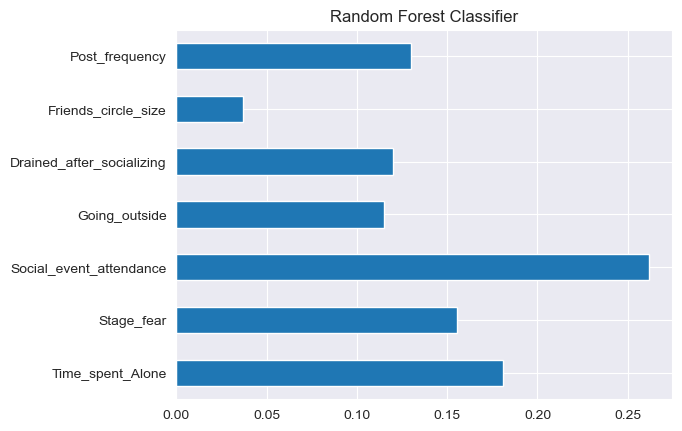

In [133]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(title="Random Forest Classifier" , legend=False)
plt.show()

## Conclusion

In this project, we developed a machine learning model to predict an individual's personality type (Extrovert or Introvert) based on various behavioral and social features such as time spent alone, stage fear, social event attendance, and more.

After performing data exploration and visualization, we implemented models like **Random Forest Classifier** and **K-Nearest Neighbors (KNN)** to classify personality types. We also examined feature importance to understand which factors most influence the predictions.

### Key Observations:
- The dataset provided useful behavioral indicators for personality classification.
- The Random Forest model provided insights into feature importance, highlighting which features contributed most to the prediction task.
- K-Nearest Neighbors, while a simple and interpretable model, required additional methods like **permutation importance** to estimate feature contributions.

### Limitations:
- The dataset size and diversity were not thoroughly examined; small or biased datasets can limit model performance.
- Only basic models were explored; more advanced models like **XGBoost** or **SVM** could be investigated.
- The project could benefit from further feature engineering or inclusion of additional psychological data.

### Future Work:
- Implement hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
- Apply cross-validation to obtain more reliable performance estimates.
- Explore advanced machine learning models and ensemble techniques.
- Investigate explainability techniques like SHAP values for better model interpretation.
- Collect or use more comprehensive datasets to improve generalization.

## Potential Improvements

While this project provides a foundational approach to personality prediction using machine learning, there are several areas where the project can be enhanced:

- **More Comprehensive Data**: The current dataset may have limitations in size or diversity. Acquiring a larger, more varied dataset would help improve model generalization.

- **Feature Engineering**: Additional features such as linguistic patterns, psychological survey data, or social media text analysis could significantly enhance prediction accuracy.

- **Advanced Modeling Techniques**: Beyond basic classifiers, experimenting with models like XGBoost, LightGBM, or Support Vector Machines (SVM) could yield better performance.

- **Hyperparameter Tuning**: Systematic tuning of model parameters using techniques like GridSearchCV or RandomizedSearchCV would help optimize model performance.

- **Cross-Validation**: Implementing k-fold cross-validation provides a more reliable evaluation compared to a single train-test split.

- **Model Interpretability**: Utilizing explainability tools like SHAP or LIME can help better understand model predictions, especially for complex models.

- **Real-World Testing**: Validating the model on real-world data or through collaboration with psychology professionals can test its practical applicability.

By implementing these improvements, the project can evolve from a basic academic exercise to a more robust, real-world applicable system.


### Final Thoughts:
This project demonstrates the potential of machine learning in understanding human behavior through data. With further improvements, such models can be useful tools in psychology, education, and HR for personality assessment and tailored recommendations.
